# Experiment 5: Implementation of Image Enhancement Methods (Spatial & Frequency Domain)

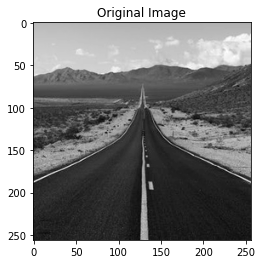

Original Image Shape: (256, 256)


In [13]:
# Importing the Libraries & Loading the Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('Images/road.bmp', cv2.IMREAD_GRAYSCALE)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.show()
print('Original Image Shape:', image.shape)

## 1. Smoothing Filters<br>Average, Weighted, Median, Minimum, Maximum, Mid-Point

In [14]:
average_filter = np.zeros(image.shape)
weighted_filter = np.zeros(image.shape)
median_filter = np.zeros(image.shape)
min_filter = np.zeros(image.shape)
max_filter = np.zeros(image.shape)
midpoint_filter = np.zeros(image.shape)

padded_image = cv2.copyMakeBorder(image, 1, 1, 1, 1, cv2.BORDER_CONSTANT) # Padding Image
print('Padded Image Shape:', padded_image.shape)

Padded Image Shape: (258, 258)


In [15]:
# Moving 3x3 Kernel Over Padded Image
for x in range(1, padded_image.shape[0]-1):
    for y in range(1, padded_image.shape[1]-1):
        neighbours = list()
        neighbours.append(padded_image[x-1][y-1]) # w0
        neighbours.append(padded_image[x-1, y])   # w1
        neighbours.append(padded_image[x-1, y+1]) # w2
        neighbours.append(padded_image[x, y-1])   # w3
        neighbours.append(padded_image[x, y])     # w4
        neighbours.append(padded_image[x, y+1])   # w5
        neighbours.append(padded_image[x+1, y-1]) # w6
        neighbours.append(padded_image[x+1, y])   # w7
        neighbours.append(padded_image[x+1, y+1]) # w8
        average_filter[x-1][y-1] = sum(neighbours) / len(neighbours)
        weighted_filter[x-1][y-1] = ((neighbours[0]+neighbours[2]+neighbours[6]+neighbours[8]) \
                                    + (2*(neighbours[1]+neighbours[3]+neighbours[5]+neighbours[7])) \
                                    + (4*neighbours[4])) / 16
        median_filter[x-1][y-1] = sorted(neighbours)[len(neighbours)//2]
        min_filter[x-1][y-1] = min(neighbours)
        max_filter[x-1][y-1] = max(neighbours)
        midpoint_filter[x-1][y-1] = (max(neighbours)+min(neighbours))/2

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in ubyte_scalars


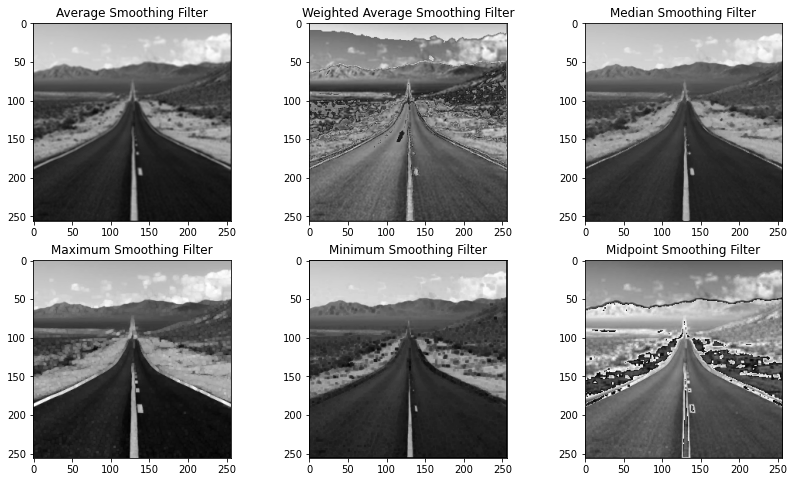

In [16]:
# Displaying Results
fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)


ax1.imshow(average_filter, cmap='gray')
ax1.title.set_text('Average Smoothing Filter')
ax2.imshow(weighted_filter, cmap='gray')
ax2.title.set_text('Weighted Average Smoothing Filter')
ax3.imshow(median_filter, cmap='gray')
ax3.title.set_text('Median Smoothing Filter')
ax4.imshow(max_filter, cmap='gray')
ax4.title.set_text('Maximum Smoothing Filter')
ax5.imshow(min_filter, cmap='gray')
ax5.title.set_text('Minimum Smoothing Filter')
ax6.imshow(midpoint_filter, cmap='gray')
ax6.title.set_text('Midpoint Smoothing Filter')
plt.show()

## 2. Smoothing with Gaussian Filter

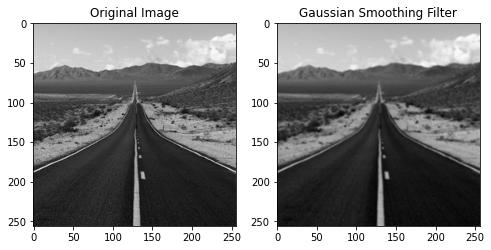

In [17]:
gaussian_filter = cv2.GaussianBlur(image, (3,3), 0)

fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.imshow(gaussian_filter, cmap='gray')
ax2.title.set_text('Gaussian Smoothing Filter')

## 3. Sharpening Filters<br>Laplace Filter, Unsharp Mask, 2D Filtering

In [18]:
# Laplace Filter
laplacian = cv2.Laplacian(image, cv2.CV_8U)

# Unsharp Masking
gaussian_blur = cv2.GaussianBlur(image, (7,7), 0)
unsharp_image = cv2.addWeighted(image, 2, gaussian_blur, -1, 0)

# 2D Filtering
conv_filter = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
filtered = cv2.filter2D(image, -1, conv_filter)

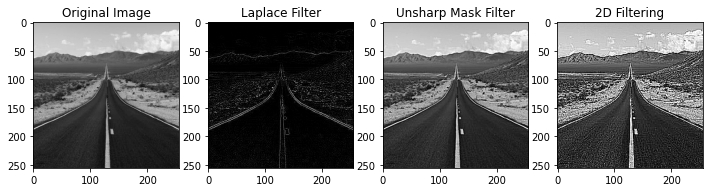

In [19]:
# Displaying Results
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.imshow(laplacian, cmap='gray')
ax2.title.set_text('Laplace Filter')
ax3.imshow(unsharp_image, cmap='gray')
ax3.title.set_text('Unsharp Mask Filter')
ax4.imshow(filtered, cmap='gray')
ax4.title.set_text('2D Filtering')

## 4. Noise Removal

In [20]:
# Adding Noise to Image
noise = np.zeros(image.shape, np.uint8)
cv2.randn(noise, mean=0, stddev=30)
noisy = cv2.add(image, noise)

# Noise Removal
colored = cv2.cvtColor(noisy, cv2.COLOR_GRAY2BGR)
denoised = cv2.fastNlMeansDenoisingColored(colored, None, 10, 10, 7, 15)

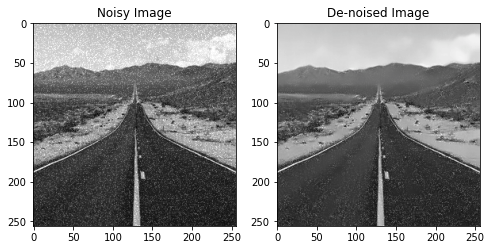

In [21]:
# Displaying Results
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(noisy, cmap='gray')
ax1.title.set_text('Noisy Image')
ax2.imshow(denoised, cmap='gray')
ax2.title.set_text('De-noised Image')

## 5. Histogram Based Processing

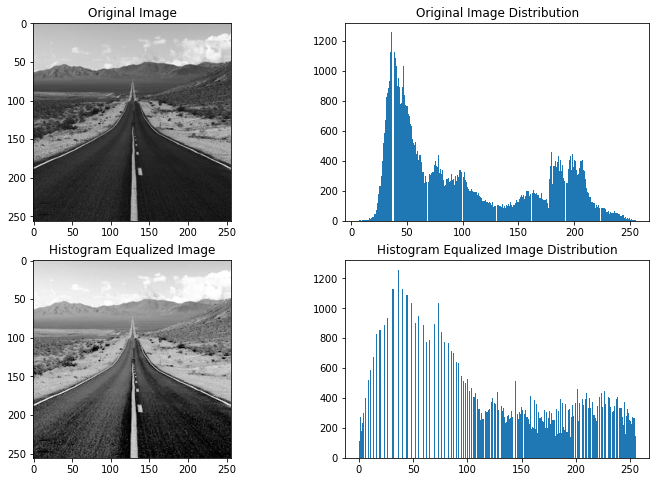

In [22]:
# Performing Histogram Equalization
equal_hist = cv2.equalizeHist(image)

# Displaying Results
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.imshow(image, cmap='gray')
ax1.title.set_text('Original Image')
ax2.hist(image.ravel(), bins=256)
ax2.title.set_text('Original Image Distribution')
ax3.imshow(equal_hist, cmap='gray')
ax3.title.set_text('Histogram Equalized Image')
ax4.hist(equal_hist.ravel(), bins=256)
ax4.title.set_text('Histogram Equalized Image Distribution')

Siddhartha Dutta<br>
A70405217037<br>
15th September, 2020